In [2]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy, json

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
""" Opening and viewing an .obj file """
obj_data = "human_nobg.obj"
mesh = o3d.io.read_triangle_mesh(obj_data)

In [4]:
# Vertices and triangles of a mesh
print("Vertices")
print(np.asarray(mesh.vertices))
print("triangles")
print(np.asarray(mesh.triangles))
points = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)

Vertices
[[ 0.17797884  0.54311508 -0.5527302 ]
 [ 0.18056023  0.55252367 -0.54773915]
 [ 0.18125631  0.55489349 -0.54644722]
 ...
 [-0.00540131  0.54369903 -0.69299304]
 [-0.00538616  0.54397172 -0.69289714]
 [-0.00538901  0.54380262 -0.6929571 ]]
triangles
[[    0     1     2]
 [    1     0     3]
 [    4     5     6]
 ...
 [75403 75404 75405]
 [ 4231  4034  4033]
 [ 4034  4231  4180]]


In [5]:
# with open("human_nobg.json", "w") as file:
#     json.dump(vertices.tolist(), file)
# print(json.dumps(vertices.tolist()))
len(vertices)

75406

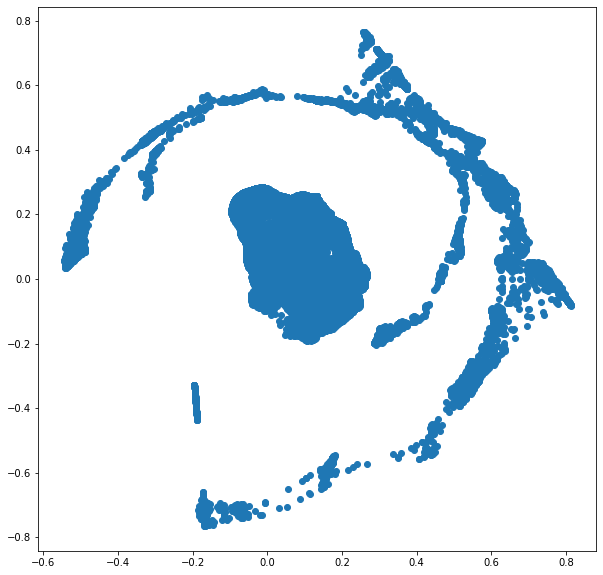

In [6]:
v= vertices[:len(vertices)]
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
plt.scatter(v[:,0],v[:,2])
fig.set_size_inches(10,10)

In [185]:
from sklearn.cluster import DBSCAN
import open3d as o3d

In [182]:
X = [[d[0], d[2]] for d in v[:len(vertices)]]
db = DBSCAN(eps=0.091, min_samples=2000).fit(X)
# print(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [183]:
samples = []
for ind in db.core_sample_indices_:
    samples.append(v[ind])

e:\programming\projects\cmu-prosthetics\venv\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


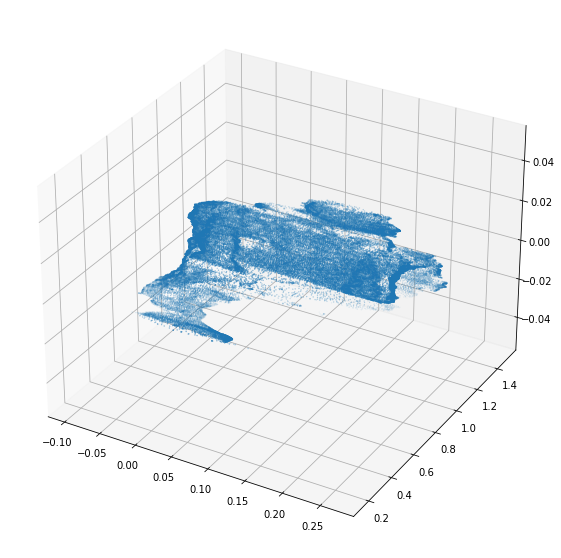

In [184]:
samp = np.asarray(samples)
fig = plt.figure()
new_v = np.asarray(f_list)
ax = fig.add_subplot(111, projection='3d')
plt.scatter(samp[:,0],samp[:,1],samp[:,2])
fig.set_size_inches(10,10)

In [186]:
with open("test.json", "w") as file:
    json.dump(samp.tolist(), file)

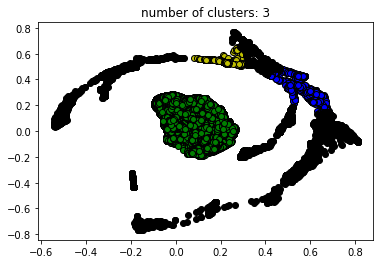

<Figure size 720x720 with 0 Axes>

In [161]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
clusters = []
# print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
    a_X = np.array(X)
    xy1 = a_X[class_member_mask & core_samples_mask]
    plt.plot(xy1[:, 0], xy1[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    # clusters.append(xy)
    xy2 = a_X[class_member_mask & ~core_samples_mask]
    plt.plot(xy2[:, 0], xy2[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    
clusters.append(xy1)  
plt.title('number of clusters: %d' % n_clusters_)
plt.figure().set_size_inches(10,10)
# plt.show()

e:\programming\projects\cmu-prosthetics\venv\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


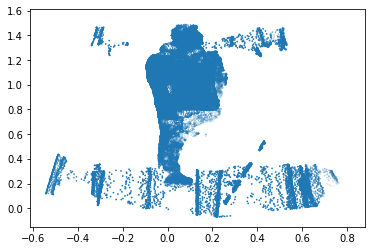

In [159]:
f_list = list(x.tolist() for x in v if x[0] and x[2] not in xy1)
# new_v = new_list[:len(new_list)]
new_v = np.asarray(f_list)
ax = fig.add_subplot(111, projection='3d')
plt.scatter(new_v[:,0],new_v[:,1],new_v[:,2])
fig.set_size_inches(10,10)

In [ ]:
# define dataset
# X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Crop Mesh

In [23]:
print("We make a partial mesh of only the first half triangles.")
mesh1 = copy.deepcopy(mesh)
mesh1.triangles = o3d.utility.Vector3iVector(
    np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])
print(mesh1.triangles)
o3d.visualization.draw_geometries([mesh1])

We make a partial mesh of only the first half triangles.
std::vector<Eigen::Vector3i> with 74920 elements.
Use numpy.asarray() to access data.


In [6]:
# Check the propertis of 3d object
edge_manifold = mesh.is_edge_manifold(allow_boundary_edges=True)
edge_manifold_boundary = mesh.is_edge_manifold(allow_boundary_edges=False)
vertex_manifold = mesh.is_vertex_manifold()
self_intersecting = mesh.is_self_intersecting()
watertight = mesh.is_watertight()
orientable = mesh.is_orientable()

print(f"  edge_manifold:          {edge_manifold}")
print(f"  edge_manifold_boundary: {edge_manifold_boundary}")
print(f"  vertex_manifold:        {vertex_manifold}")
print(f"  self_intersecting:      {self_intersecting}")
print(f"  watertight:             {watertight}")
print(f"  orientable:             {orientable}")

  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        False
  self_intersecting:      True
  watertight:             False
  orientable:             True


Average filter

In [16]:
n_iter = 10
print(f"filter with average with {n_iter} iteration(s)")
mesh_out = mesh.filter_smooth_simple(number_of_iterations=n_iter)
# # computing normal
mesh_out.compute_vertex_normals()

# # Rendering a mesh
o3d.visualization.draw_geometries([mesh])

filter with average with 10 iteration(s)


Laplacian filter

In [20]:
n_iter = 150
print(f"filter with Laplacian with {n_iter} iteration(s)")
mesh_out = mesh.filter_smooth_laplacian(number_of_iterations=n_iter)
# # computing normal
mesh_out.compute_vertex_normals()

# # Rendering a mesh
o3d.visualization.draw_geometries([mesh])

filter with Laplacian with 150 iteration(s)
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


Taubin filter
The problem with the average and Laplacian filter is that they lead to a shrinkage of the triangle mesh. [Taubin1995] showed that the application of two Laplacian filters with different λ parameters can prevent the mesh shrinkage.

In [19]:
n_iter = 100
print(f"filter with Taubin with {n_iter} iteration(s)")
mesh_out = mesh.filter_smooth_taubin(number_of_iterations=n_iter)
# # computing normal
mesh_out.compute_vertex_normals()

# # Rendering a mesh
o3d.visualization.draw_geometries([mesh])

filter with Taubin with 100 iteration(s)
